# Import data

In [1]:
import pandas_datareader as pda                   # there has datasets

In [2]:
df = pda.DataReader("TSLA", data_source = "yahoo", start = "2010-01-01", end = "2020-12-31")                       
                                     # amazon = AMZN
                                     # apple  = AAPL
                                     # google = GOOG
                                     # tesla  = TSLA             # that data in "yahoo finance"

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [4]:
# now a days yahoo provide a package for this

# import pip 
# pip.main(["install", "yfinance"])

In [5]:
# new technique

import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = yf.download("AAPL", start = "2010-01-01", end = "2021-12-31")    

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.425999,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.526021,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.537303,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.433319,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.421426,477131200


In [8]:
type(df)                   # yfinance provide pandas dataframe

pandas.core.frame.DataFrame

In [9]:
df = df["Close"].to_frame()
df.head(10)                         # Stock market not work in a holyday, therefore these days havn't price for holyday

,Close
Date,
2009-12-31,7.526071
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
2010-01-11,7.503929
2010-01-12,7.418571
2010-01-13,7.523214


In [10]:
# this is time series, data depend on other variable(multilinearity), therefore we can't use regression
# we can't predicted holidays, becasethese haven't stock market (we predict next price)
# but we have to method for use this situation

In [11]:
df["Close"].shift(2)           # shift 2 days to forword

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05      7.526071
2010-01-06      7.643214
2010-01-07      7.656429
                 ...    
2021-12-23    172.990005
2021-12-27    175.639999
2021-12-28    176.279999
2021-12-29    180.330002
2021-12-30    179.289993
Name: Close, Length: 3021, dtype: float64

In [12]:
df["Close"].shift(-2)                # shift 2 days to backword

Date
2009-12-31      7.656429
2010-01-04      7.534643
2010-01-05      7.520714
2010-01-06      7.570714
2010-01-07      7.503929
                 ...    
2021-12-23    179.289993
2021-12-27    179.380005
2021-12-28    178.199997
2021-12-29           NaN
2021-12-30           NaN
Name: Close, Length: 3021, dtype: float64

In [13]:
df["Close price in 10 days"] = df["Close"].shift(-10)                      # got the 10 days to backword data to today data
df.tail(20)

,Close,Close price in 10 days
Date,,
2021-12-02,163.759995,172.259995
2021-12-03,161.839996,171.139999
2021-12-06,165.320007,169.750000
2021-12-07,171.179993,172.990005
2021-12-08,175.080002,175.639999
2021-12-09,174.559998,176.279999
2021-12-10,179.449997,180.330002
2021-12-13,175.740005,179.289993
2021-12-14,174.330002,179.380005


In [14]:
# this is not good way to time series data, we use that kind of way becase machine learning havn't method for time series data
# you can use time series analysis method for handale that kind of data(ARIMA, RIMA, ...)

In [15]:
# remove NaN values

dfc = df.iloc[:-10, :]
dfc.reset_index(inplace=True)
dfc.tail(15)

,Date,Close,Close price in 10 days
2996,2021-11-24,161.940002,174.559998
2997,2021-11-26,156.809998,179.449997
2998,2021-11-29,160.240005,175.740005
2999,2021-11-30,165.300003,174.330002
3000,2021-12-01,164.770004,179.300003
3001,2021-12-02,163.759995,172.259995
3002,2021-12-03,161.839996,171.139999
3003,2021-12-06,165.320007,169.750000
3004,2021-12-07,171.179993,172.990005
3005,2021-12-08,175.080002,175.639999


# Model Build

In [16]:
X = dfc["Close"].values.reshape(dfc["Close"].shape[0], 1)                   # x work in two dimension array only, therefore we should convert it to 2 dimention array
y = dfc["Close price in 10 days"].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [19]:
y_pred = rf.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_pred, y_test))

3.4489389679513573

# Forcasting last 10 days

In [21]:
y_act_10 = dfc.iloc[-10:,:]["Close price in 10 days"].values
y_act_10

array([172.25999451, 171.13999939, 169.75      , 172.99000549,
       175.63999939, 176.27999878, 180.33000183, 179.28999329,
       179.38000488, 178.19999695])

In [22]:
y_pred_10 = rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))
y_pred_10

array([174.2672977 , 174.23805994, 171.75822049, 178.25316248,
       176.30859882, 177.04339987, 179.46941977, 178.27555545,
       178.34540244, 178.69409799])

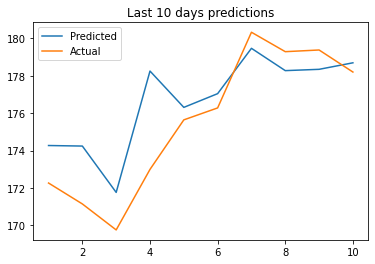

In [23]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()

In [24]:
# predict value in last 100 days

y_actual_last_100 = dfc.iloc[-100:, 2].values
y_pred_last_100 = rf.predict(dfc.iloc[-100:, 1].values.reshape(dfc.iloc[-100:, 0].shape[0], 1))

np.sqrt(mean_squared_error(y_actual_last_100, y_pred_last_100))

4.364835577222066

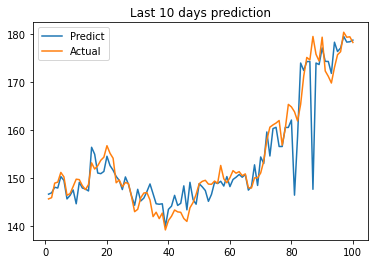

In [25]:
plt.plot(range(1, 101), y_pred_last_100)
plt.plot(range(1, 101), y_actual_last_100)
plt.legend(["Predict", "Actual"])
plt.title("Last 10 days prediction")
plt.show()

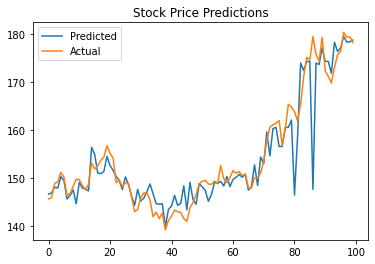

In [26]:
plt.plot(rf.predict(X[-100:]))
plt.plot(y[-100:])
plt.legend(["Predicted","Actual"])
plt.title("Stock Price Predictions")
plt.show()

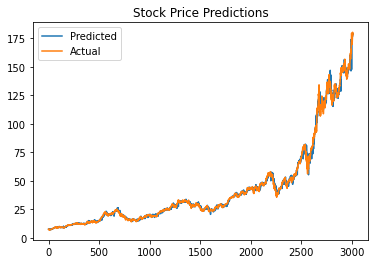

In [27]:
plt.plot(rf.predict(X))
plt.plot(y)
plt.legend(["Predicted","Actual"])
plt.title("Stock Price Predictions")
plt.show()